### Importing the Python libraries

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

In [2]:
df=pd.read_csv('uber_rides_data.xlsx - sample_train.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ride_id            200000 non-null  int64  
 1   fare_amount        200000 non-null  float64
 2   pickup_datetime    200000 non-null  object 
 3   pickup_longitude   200000 non-null  float64
 4   pickup_latitude    200000 non-null  float64
 5   dropoff_longitude  199999 non-null  float64
 6   dropoff_latitude   199999 non-null  float64
 7   passenger_count    200000 non-null  int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 12.2+ MB


**This dataset appears to contain information about Uber rides, including details about their locations (pickup and drop-off), costs, timing, and passenger counts. It can be used for various analytical purposes, such as studying ride patterns, estimating fare trends.**

In [4]:
df.isnull().sum()

ride_id              0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

 **Based on the above result, it shows that the columns 'dropoff_longitude' and 'dropoff_latitude' each have 1 null value, while the other columns have no null values. This information can be useful for data cleaning and analysis, as you may need to decide how to handle or impute these missing values in your analysis.**

**As we see above the `pickup_datetime` is in object format so we need to convert it into proper datetime format.** 


In [7]:
df['pickup_datetime']=pd.to_datetime(df['pickup_datetime'],utc=bool)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   ride_id            200000 non-null  int64              
 1   fare_amount        200000 non-null  float64            
 2   pickup_datetime    200000 non-null  datetime64[ns, UTC]
 3   pickup_longitude   200000 non-null  float64            
 4   pickup_latitude    200000 non-null  float64            
 5   dropoff_longitude  199999 non-null  float64            
 6   dropoff_latitude   199999 non-null  float64            
 7   passenger_count    200000 non-null  int64              
dtypes: datetime64[ns, UTC](1), float64(5), int64(2)
memory usage: 12.2 MB


In [9]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5


In [10]:
df.dropna()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5
...,...,...,...,...,...,...,...,...
199995,42598914,3.0,2012-10-28 10:49:00+00:00,-73.987042,40.739367,-73.986525,40.740297,1
199996,16382965,7.5,2014-03-14 01:09:00+00:00,-73.984722,40.736837,-74.006672,40.739620,1
199997,27804658,30.9,2009-06-29 00:42:00+00:00,-73.986017,40.756487,-73.858957,40.692588,2
199998,20259894,14.5,2015-05-20 14:56:25+00:00,-73.997124,40.725452,-73.983215,40.695416,1


**The result of running this code is a DataFrame with the rows containing missing values removed. In this case,any rows with missing values were removed from the DataFrame, leaving us with a DataFrame containing `199,999 rows and 8 columns.`**

In [11]:
df.fare_amount.mean()

11.359955250000626

__computing the mean value of all the fare amounts in that column.__

In [13]:
df.fare_amount.max()

499.0

__This means that 499.0 is the highest fare amount among all the Uber rides in the dataset.__

In [14]:
import math

def haversine(pickup_latitude, pickup_longitude, dropoff_latitude, dropoff_longitude):
    
    # Converting latitude and longitude from degrees to radians
    
    pickup_latitude = math.radians(pickup_latitude)
    pickup_longitude = math.radians(pickup_longitude)
    dropoff_latitude = math.radians(dropoff_latitude)
    dropoff_longitude = math.radians(dropoff_longitude)

    # Haversine formula
    # credit: Wikipedia
    
    dlon = dropoff_longitude - pickup_longitude
    dlat = dropoff_latitude - pickup_latitude
    
    a = math.sin(dlat/2)**2 + math.cos(pickup_latitude) * math.cos(dropoff_latitude) * math.sin(dlon/2)**2
    
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))
    
    R = 6371  # Radius of the Earth in kilometers
    distance = R * c

    return distance

__Above code defines a Python function called haversine that calculates the distance between two points on the Earth's surface using their latitude and longitude coordinates. It uses the Haversine formula, which is a mathematical formula used to find the shortest distance between two points on a sphere, such as the Earth.__

In [15]:
df['haversine_distance'] = df.apply(lambda df: haversine(df['pickup_latitude'], 
                                                          df['pickup_longitude'],
                                                          df['dropoff_latitude'], 
                                                          df['dropoff_longitude']),
                                                          axis=1)


In [17]:
df.haversine_distance.median()

2.1209923961833708

__The haversine_distance column is the distance between the pickup and dropoff locations of each ride, calculated using the Haversine formula.__

__This can be used to get a sense of the typical distance of a ride in the dataset.__

In [124]:
df.haversine_distance.max()

16409.239135313168

In [18]:
len(df[df['haversine_distance']== 0.0])

5632

__This means that these 5632 rides are essentially no-trips, as the
driver did not move from their starting location. This could be due 
to a number of reasons, such as the driver canceling the ride before it 
started, or the passenger canceling the ride after it started.__

In [22]:
zero_dist=df[df['haversine_distance']== 0.0]

In [23]:
fare_amount_mean=(df[df['haversine_distance']== 0.0]['fare_amount']).mean()

In [24]:
fare_amount_mean

11.585317826704578

__This means that the average fare amount for rides where the pickup and dropoff locations are the same is 11.58. This is a very low fare amount, and it suggests that these rides are likely no-trips, as the driver did not move from their starting location.__

__It is also possible that these rides are very short trips, such as a driver picking up a passenger from their driveway and dropping them off at their front door.__

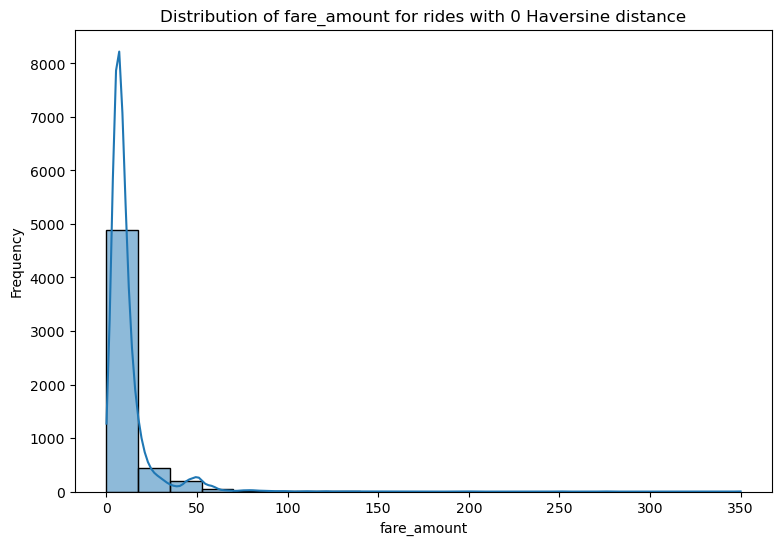

In [25]:
plt.figure(figsize=(9,6))
sns.histplot(zero_dist['fare_amount'], bins=20, kde=True)
plt.title('Distribution of fare_amount for rides with 0 Haversine distance')
plt.xlabel('fare_amount')
plt.ylabel('Frequency')
plt.show()

__The mean fare amount `(11.58)` for rides with 0 haversine distance is very high, even higher than the mean fare amount `(11.35)` for all rides. This suggests that there may be some rides with 0 haversine distance that are not legitimate. For example, a driver may have simply started the ride and then ended it immediately, without actually driving anywhere.__

In [26]:
df[df['fare_amount'] == df['fare_amount'].max()]

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance
170081,51151143,499.0,2011-04-10 04:10:00+00:00,-73.968377,40.764602,-73.968368,40.7646,1,0.00079


__The haversine distance between the pickup and dropoff location for the `costliest ride is 0.00079`. This is a very short distance, and it would be expected to have a `much lower fare amount` than the actual fare amount of `$499`.__

In [27]:
df['year'] = df['pickup_datetime'].dt.year
df['quarter'] = df['pickup_datetime'].dt.quarter

In [28]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,quarter
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,2
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,3
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,3
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,2
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,3


In [29]:
len(df[df['year']==2014])

29968

In [30]:
first_quater=df[(df['year']==2014) & (df['quarter']==1)]

__Specifically, it's determining how many rows or records are present in the first_quarter__

In [31]:
len(first_quater)

7687

In [32]:
# Add a column for the day of the week

df['day_of_week'] = df['pickup_datetime'].dt.weekday

In [33]:
df.head()

,ride_id,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,haversine_distance,year,quarter,day_of_week
0,24238194,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,1.683323,2015,2,3
1,27835199,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,2.457590,2009,3,4
2,44984355,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,5.036377,2009,3,0
3,25894730,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,1.661683,2009,2,4
4,17610152,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,4.475450,2014,3,3


__On which day of the week in September 2010, maximum rides were recorded ?__

In [34]:
september_2010_rides = df[(df['year'] == 2010) & (df['pickup_datetime'].dt.month == 9)]

day_with_max_rides = september_2010_rides['day_of_week'].value_counts().idxmax()

day_with_max_rides

3

Day of the week | Number
-------         | --------
Monday          | 0
Tuesday         | 1
Wednesday       | 2
Thursday        | 3
Friday          | 4
Saturday        | 5
Sunday          | 6

__This means that on Thursday, there were more rides than any other day of the week in September 2010. This could be due to a number of factors, such as people going to work or school on weekdays, or people taking weekend trips on Fridays and Saturdays.__